In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

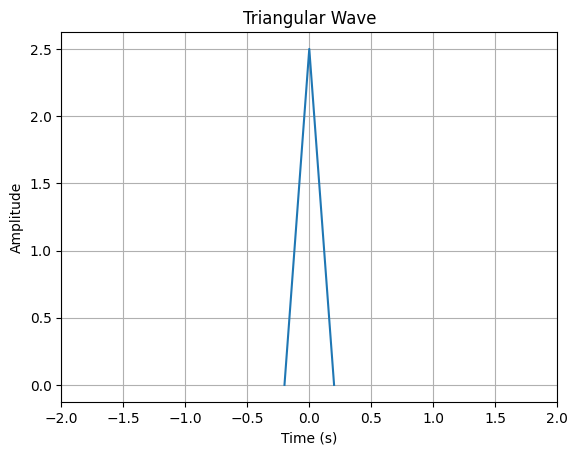

In [164]:
amp = 2.5 
b = 2
period = 0.4
x1 = np.linspace(-0.2, 0.0, 100) 
x2 = np.linspace(0.0, 0.2, 100)

def triangle_wave(amp, b, x, period, c):
    return ((c * (b * amp * x)) / period) + amp

triangle_sig1 = triangle_wave(amp, b, x1, period, 1)
triangle_sig2 = triangle_wave(amp, b, x2, period, -1)


xc = np.concatenate((x1, x2))
triangle_sig = np.concatenate((triangle_sig1, triangle_sig2))



plt.plot(xc, triangle_sig)
plt.title('Triangular Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(-2,2)
plt.grid(True)
    



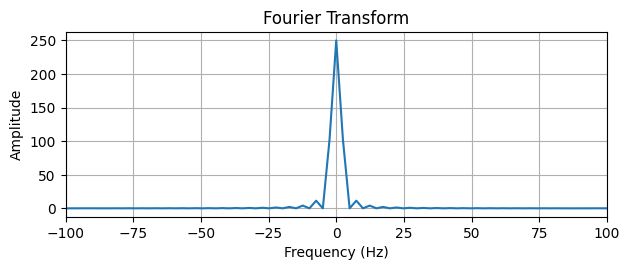

In [165]:
plt.subplot(2, 1, 2)
fft_result = np.fft.fft(triangle_sig)
fft_freqs = np.fft.fftfreq(len(triangle_sig), d=(xc[1] - xc[0]))
fft_result_shifted = np.fft.fftshift(fft_result)
fft_freqs_shifted = np.fft.fftshift(fft_freqs)
plt.plot(fft_freqs_shifted, np.abs(fft_result_shifted))
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(-100, 100) 
plt.tight_layout()
plt.show()